# Analyzing NYTbd Sample 4
<br>
This notebook is looking at the NYTbd Sample 4 content analyzed by ACCENT and PETRARCH2 to identify current limitations with PETRARCH2 and to try and devise solutions. 

In [1]:
# Setup Environment
from nltk.parse.corenlp import CoreNLPServer
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.parse import CoreNLPParser

import pandas as pd

import pprint
import nltk

from nltk.tree import *
from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Link to Java Server for Standford CoreNLP
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 100000

In [2]:
# Connect to Server
parser = CoreNLPParser('http://localhost:9000')
depr = CoreNLPDependencyParser('http://localhost:9000')

#### Write Some Functions for Parsing Text

In [3]:
# Core Parser- save as df['parsed']
def core_parser(df, col):
    parse = []
    i = ""
    for i in range(len(df)):
        parse.append(i)
        parse[i] = next(parser.raw_parse(df[col].iloc[i]))
    return parse

# Dependency Parser- save as df['dep']
def dep_parser(df, col):
    dep = []
    i = ""
    for i in range(len(df)):
        dep.append(i)
        dep[i] = next(depr.raw_parse(df[col].iloc[i]))
    return dep

# For easy display of both parse trees, text, and code
def easy_read(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display only constituency parse with POS tags with text and code
def parsed_output(corp, index_num):
    display("AID = " + str(corp.iloc[index_num].loc['aid']))
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    display("Text = " + corp.iloc[index_num].loc['text'])
    display(corp['parsed'].iloc[index_num])

# function to display only dependency parse with text and code
def dependency_output(corp, index_num):
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display constituency parse of a single sentence
def one_sentence_parser(text):
    output = next(parser.raw_parse(text))
    return output

## Read in NYTbd Sample 4 Data- ACCENT and PETRARCH

In [4]:
accent5 = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 5/Sample5_run1/Accent_sample5_events_text.dta")
petrarch5_full = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 5/Sample5_run1/Petrach_NYTbd_sample5_run1_events_text.dta")

In [5]:
# Convert Data Types to int32
petrarch5_full['code'] = petrarch5_full['code'].astype('int32')
petrarch5_full['aid'] = petrarch5_full['aid'].astype('int32')

accent5['code'] = accent5['code'].astype('int32')
accent5['aid'] = accent5['aid'].astype('int32')

# extract relevant_codes from accent5
relevant_codes = accent5.code.unique()

# trim petrarch5_full down to relevant codes
petrarch5 = petrarch5_full[petrarch5_full['code'].isin(relevant_codes)]

## Parse Text

In [6]:
%time 
accent5['parsed'] = core_parser(accent5, 'text')
accent5['dep'] = dep_parser(accent5, 'text')

petrarch5['parsed'] = core_parser(petrarch5, 'text')
petrarch5['dep'] = dep_parser(petrarch5, 'text')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
keys = list(['aid', 'code'])
accent5_index = accent5.set_index(keys).index
petrarch5_index = petrarch5.set_index(keys).index

# Produce df's of mutually exclusive events 
accent5_only = accent5[~accent5_index.isin(petrarch5_index)]
petrarch5_only = petrarch5[~petrarch5_index.isin(accent5_index)]

# Produce df's of same article, same coding
accent5_same_code = accent5[accent5_index.isin(petrarch5_index)]
petrarch5_same_code = petrarch5[petrarch5_index.isin(accent5_index)]

# sort values on AID and reset index 
accent5_only = accent5_only.sort_values('aid').reset_index(drop = True)
petrarch5_only = petrarch5_only.sort_values('aid').reset_index(drop = True)

accent5_same_code = accent5_same_code.sort_values('aid').reset_index(drop = True)
petrarch5_same_code = petrarch5_same_code.sort_values('aid').reset_index(drop = True)

## Look for errors in ACCENT and remove from data
<br>
Event codes: 1711, 1712, 1724, 182, 1821, 1822, 1823, 185, 186

In [9]:
# for i in range(len(accent5_only[accent5_only.code == 182])):
#     parsed_output(accent5_only[accent5_only.code == 182], i)
#     display(i)

In [10]:
# trim errors out of ACCENT output : refer to "ACCENT_SAMPLE5_ERRORS.docx" for documentation of errors
accent5_1711 = accent5_only[accent5_only.code == 1711].reset_index(drop = True).drop([1, 2, 3, 4, 5, 10, 14, 15, 16, 18, 22, 23]).reset_index(drop = True)

accent5_1712 = accent5_only[accent5_only.code == 1712].reset_index(drop = True).drop([1, 2, 9, 10, 11, 18]).reset_index(drop = True)

accent5_1724 = accent5_only[accent5_only.code == 1724].reset_index(drop = True)

accent5_182 = accent5_only[accent5_only.code == 182].reset_index(drop = True).drop([1, 2, 6, 7, 12, 13, 16, 17, 18, 21, 22]).reset_index(drop = True)

accent5_1821 = accent5_only[accent5_only.code == 1821].reset_index(drop = True).drop([14, 21]).reset_index(drop = True)

accent5_1822 = accent5_only[accent5_only.code == 1822].reset_index(drop = True).drop([8, 9, 10, 11, 15, 16, 21]).reset_index(drop = True)

accent5_1823 = accent5_only[accent5_only.code == 1823].reset_index(drop = True).drop([9]).reset_index(drop = True)

accent5_185 = accent5_only[accent5_only.code == 185].reset_index(drop = True).drop([16, 18]).reset_index(drop = True)

accent5_186 = accent5_only[accent5_only.code == 186].reset_index(drop = True).drop([3, 7, 18]).reset_index(drop = True)

## Print ACCENT Output to Identify Dictionary Improvements

'AID = 22443787'

'Code = 186'

'Text = A platoon-sized group of noncommissioned officers burst into the executive mansion and assassinated President William Tolbert.'

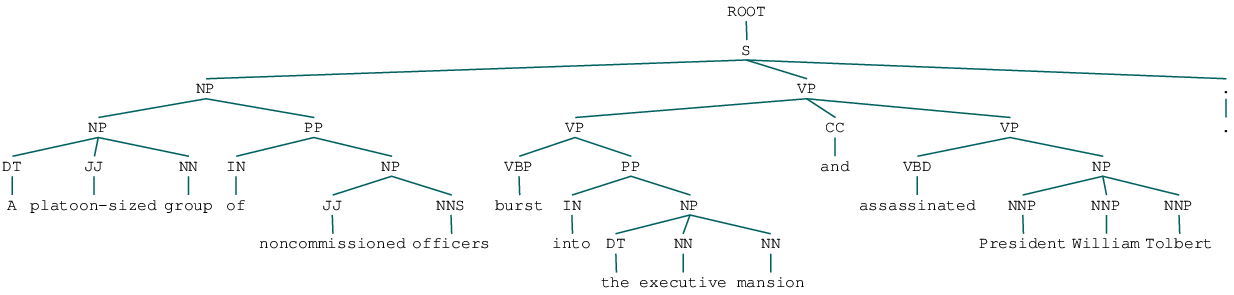

0

'AID = 22470022'

'Code = 186'

'Text = The expansion of crime in the Sun Belt was illustrated by the evidence presented in the trial of Charles Voyde Harrelson, who was convicted Tuesday in San Antonio of killing a Federal district judge for $250,000.\\n\\n\\n\\nMr.'

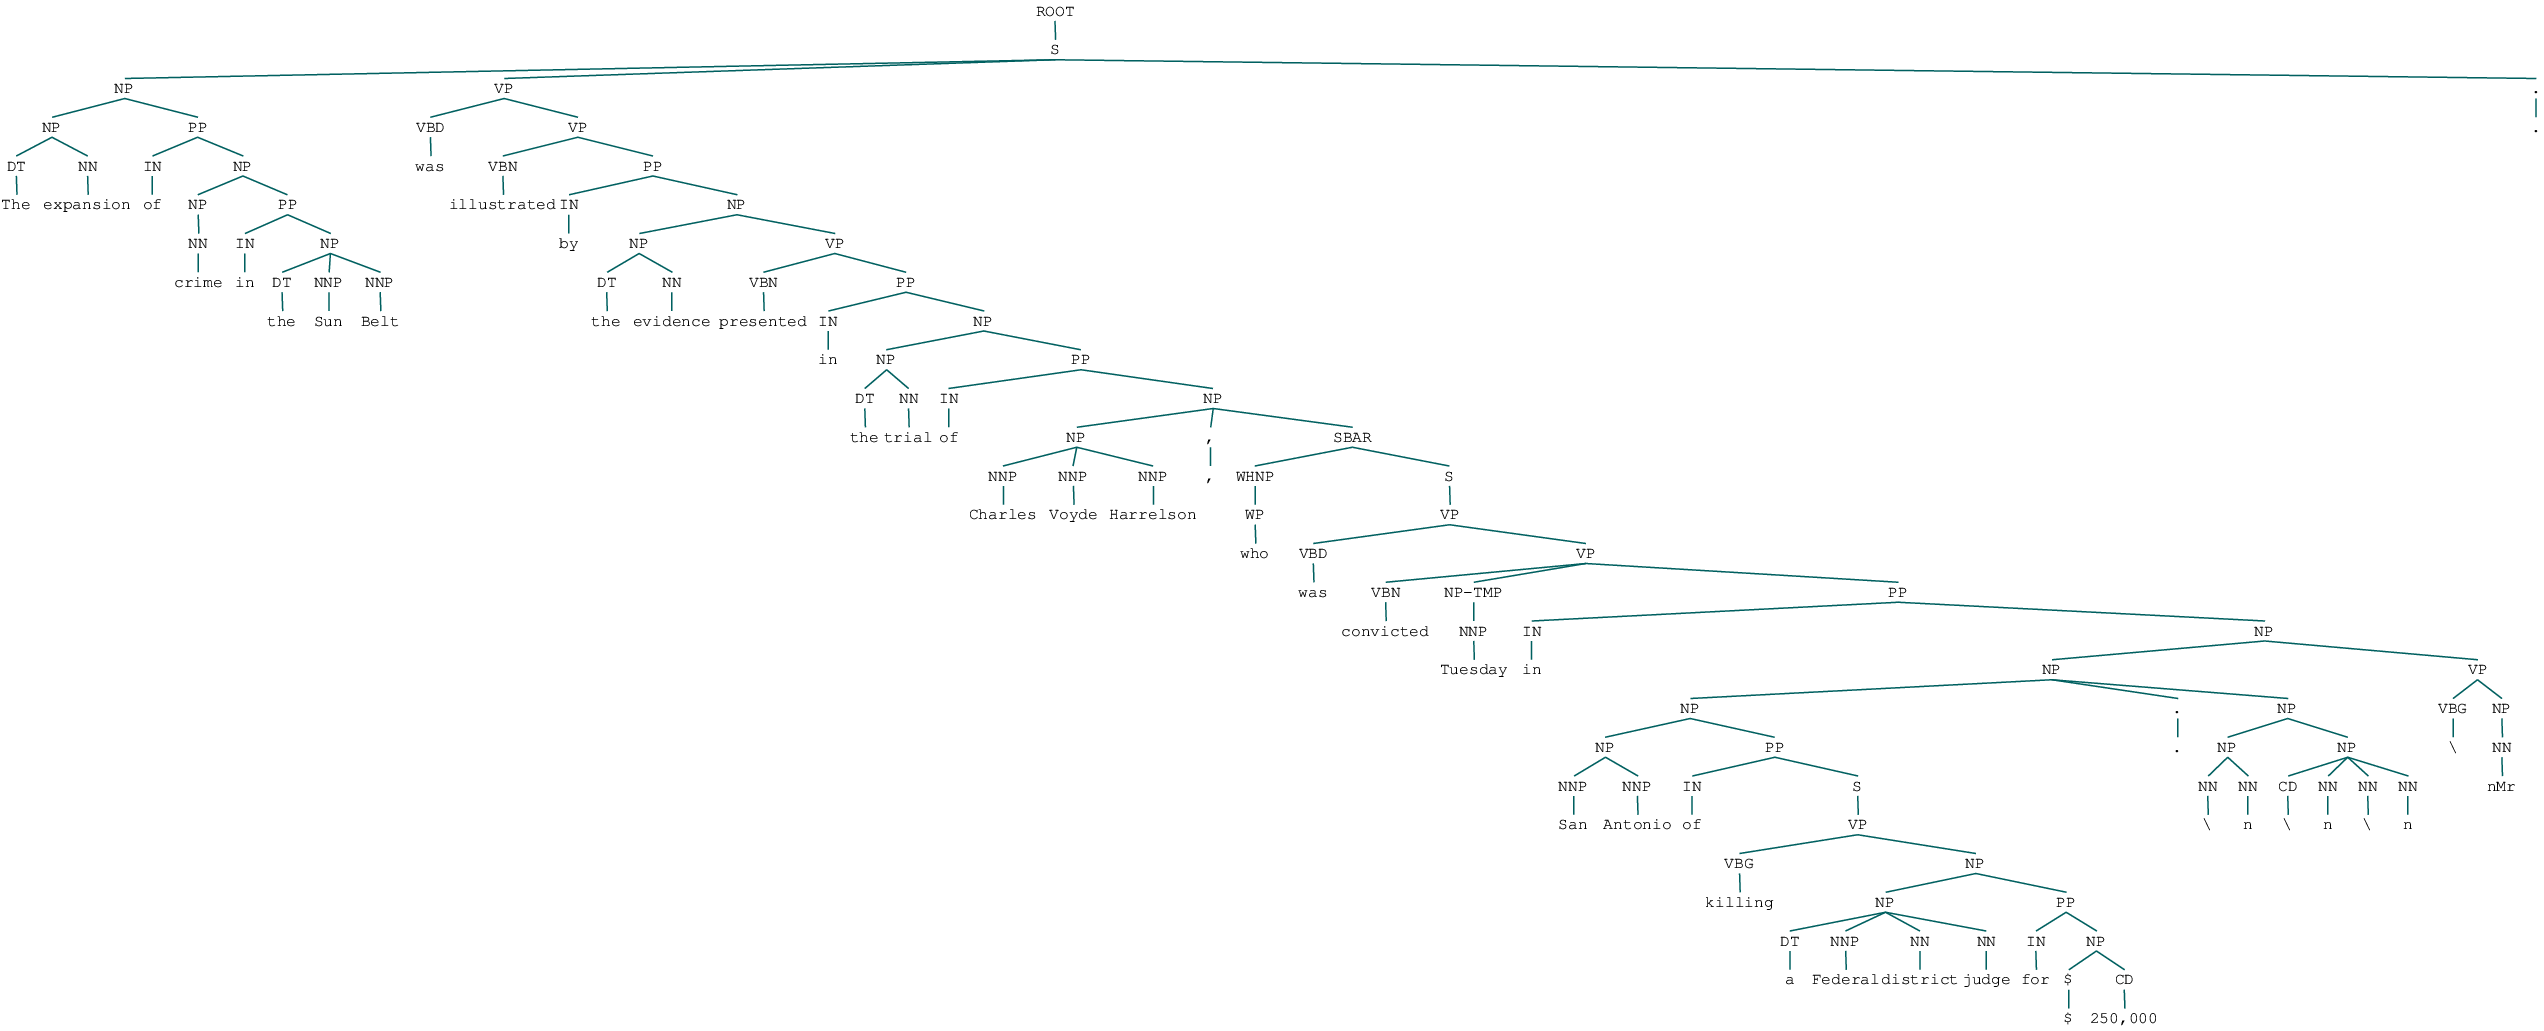

1

'AID = 22550429'

'Code = 186'

'Text = "The Justice Department is cooperating with efforts by Argentina to extradite Michael Vernon Townley, an American who was convicted of assassinating a Chilean exile here in 1976.'

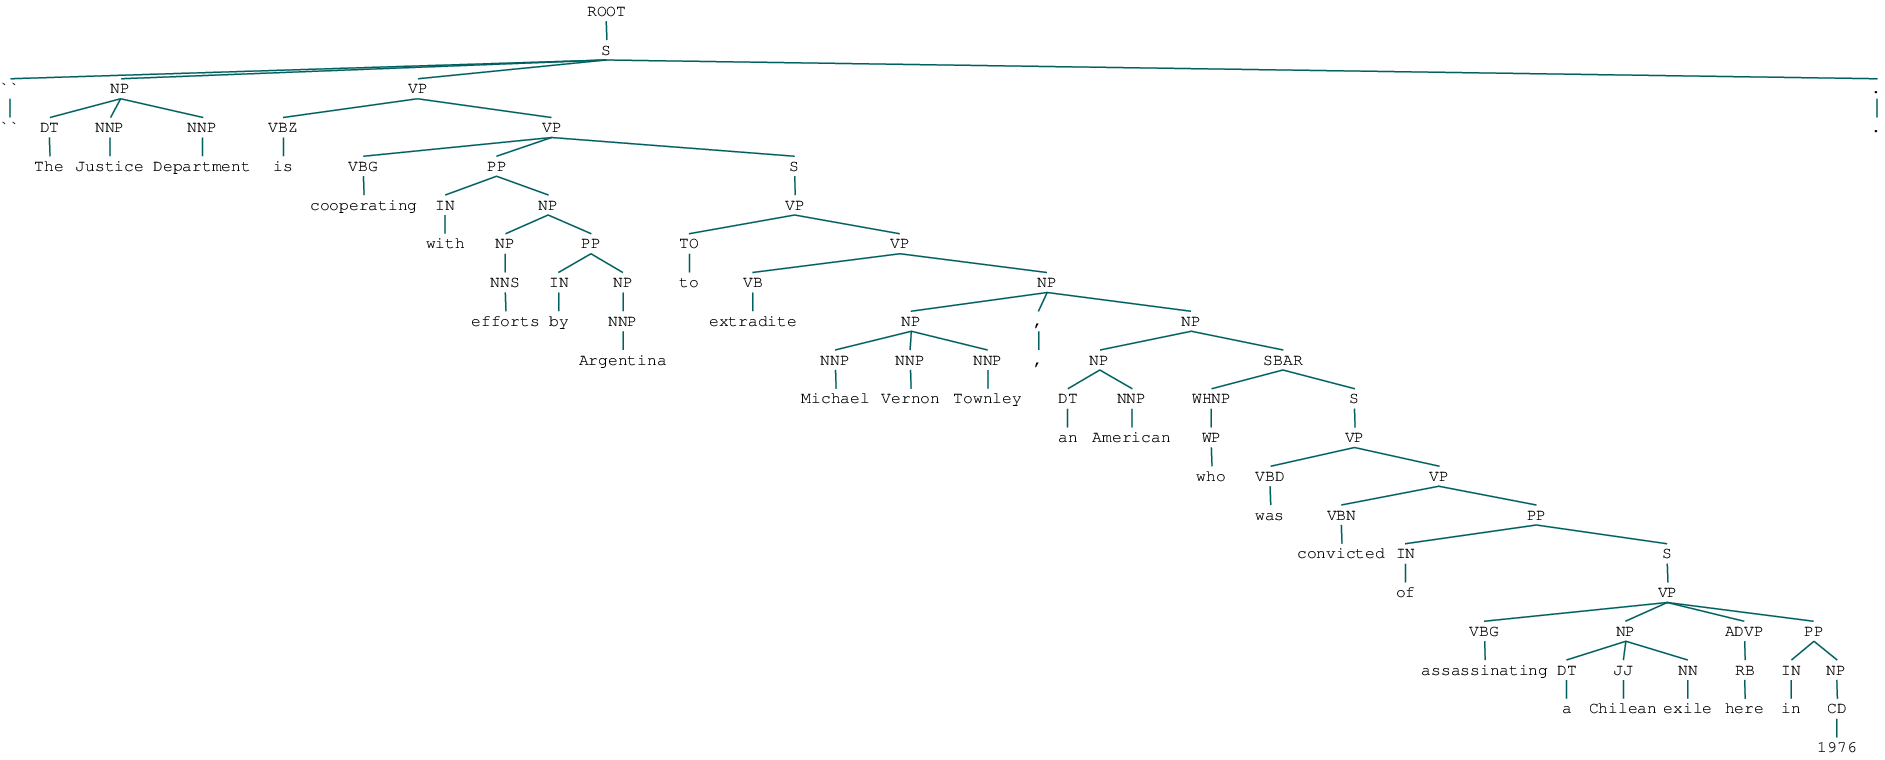

2

'AID = 22809974'

'Code = 186'

'Text = Castellano was assassinated by gunmen in New York City in December 1985, and Mr. Corallo was convicted on Federal racketeering charges last year in the so-called commission case, in which the reputed leaders of the five organized crime families in the New York metropolitan area were sentenced to long prison terms.\\n\\n\\nAuthorities in the '

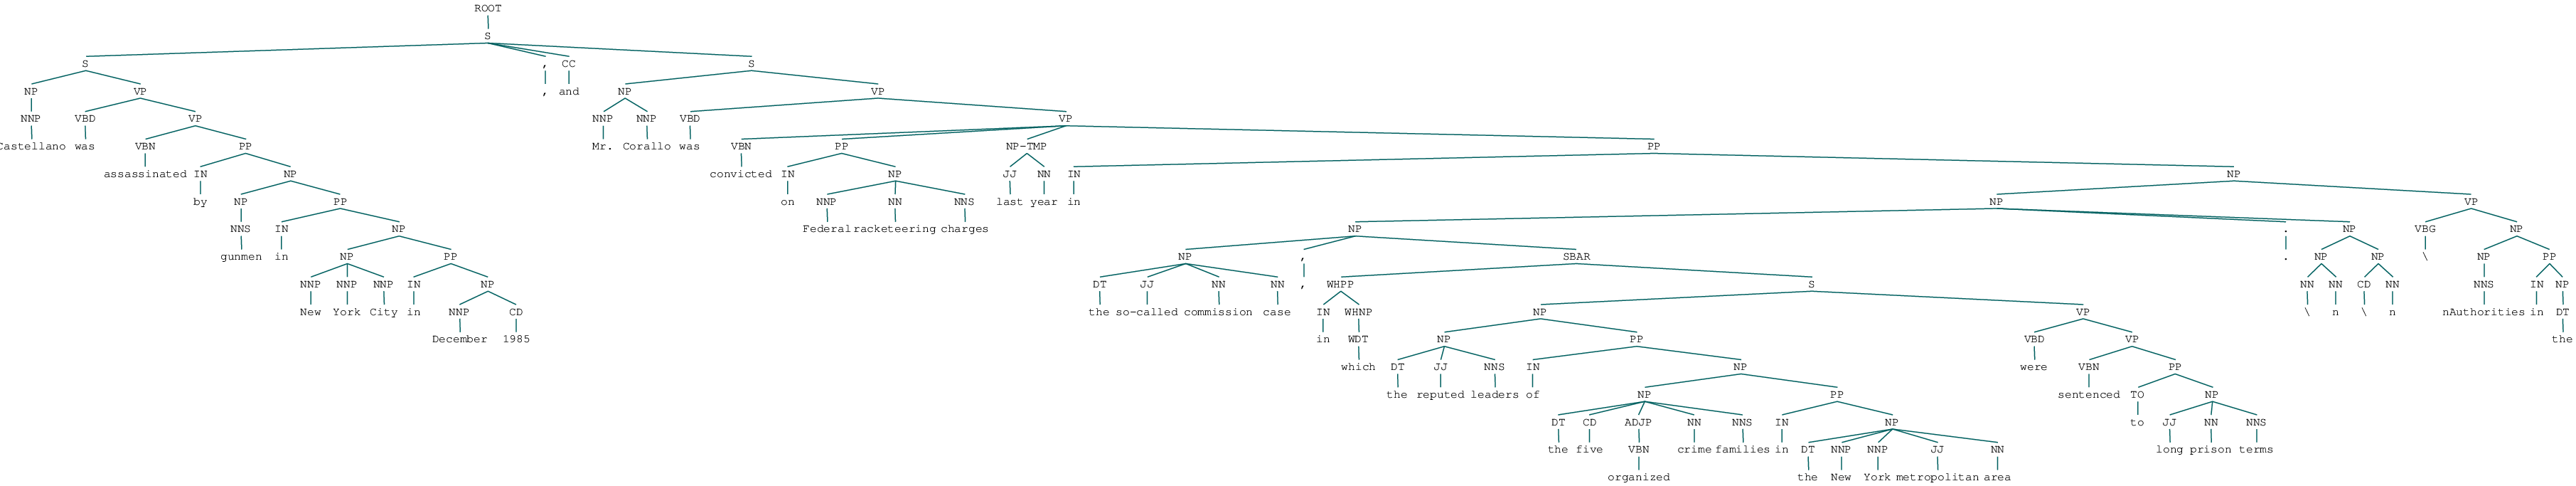

3

'AID = 22912114'

'Code = 186'

"Text = After nearly two years' work and the expenditure of $5.8 million, they had concluded that Lee Harvey Oswald, acting alone, had assassinated President Kennedy, wounded Governor Connally and killed Officer Tippit."

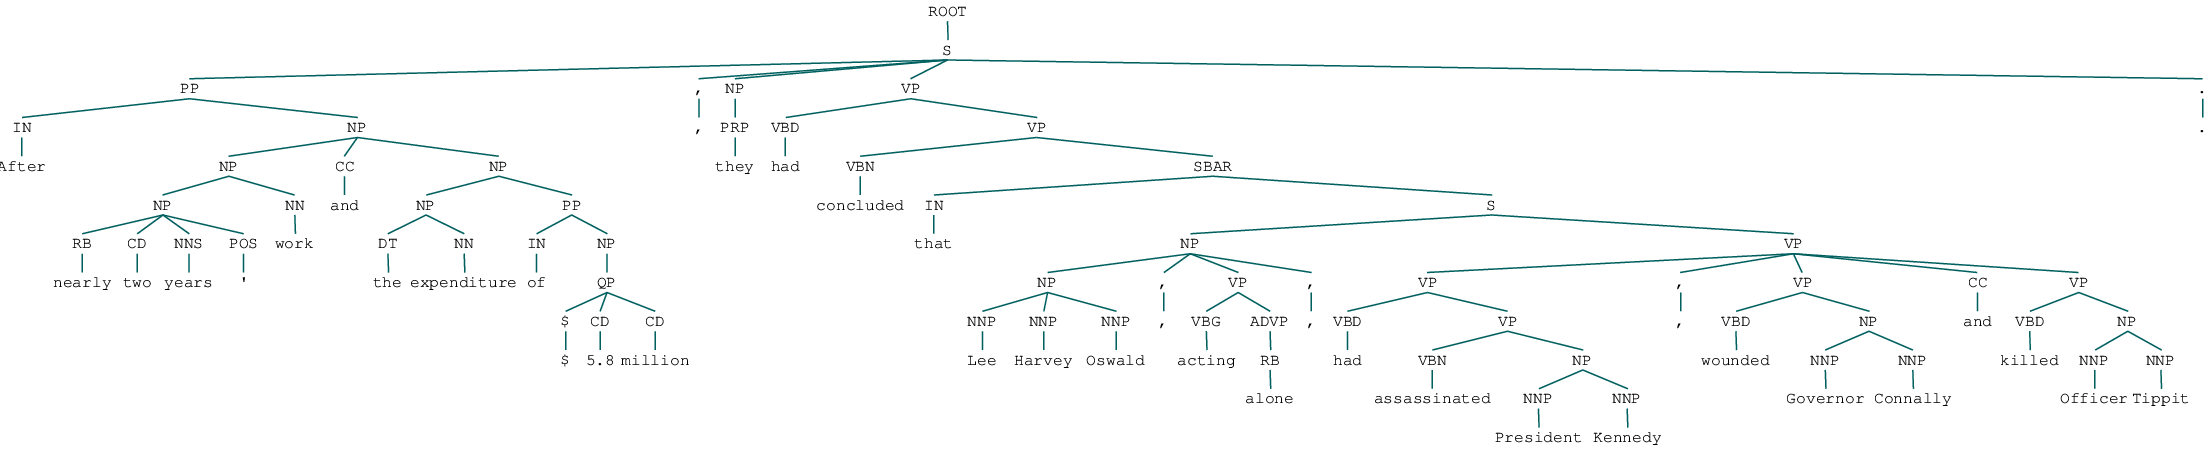

4

'AID = 22934235'

'Code = 186'

"Text = Throughout the 1970's, he was diverted by a series of snazzy girlfriends.\\n\\n\\n\\nLord Mountbatten, the Prince's mentor until his assassination by the Irish Republican Army in 1979, helped guide Charles with scare stories about how the previous Prince of Wales, Edward VIII,"

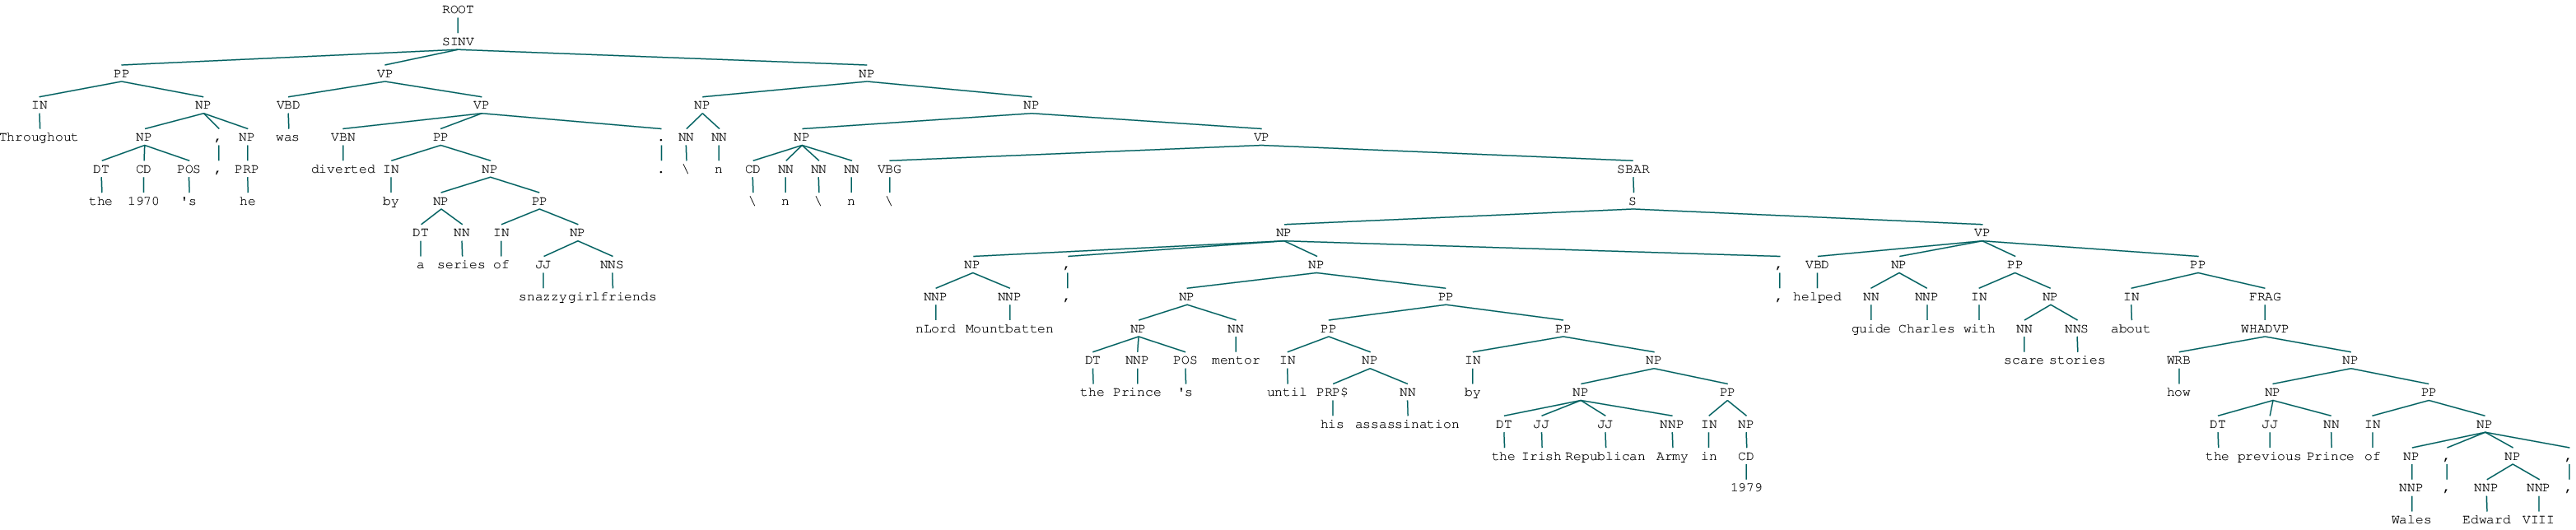

5

'AID = 23082229'

'Code = 186'

'Text = The agreement unraveled after Mr. Longowal\'s assassination by Sikh extremists soon after the accord.\\n\\n\\nThe killing of Mr. Singh came during a surge of clashes in Punjab and neighboring Jammu and Kashmir State in which more than 70 people have been killed since Saturday.\\nNews reports from Punjab said that 56 people, including 12 policemen and 11 separatist militants, have been killed in the last three days."'

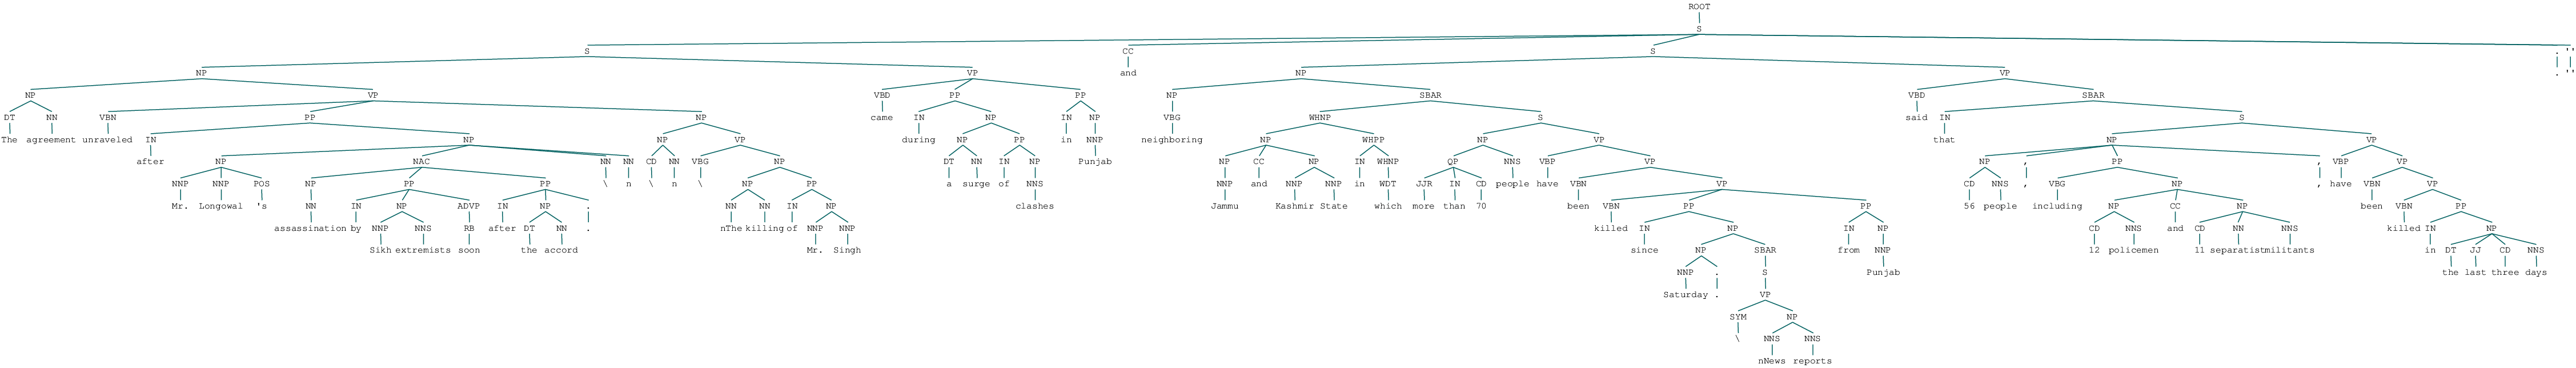

6

'AID = 23481535'

'Code = 186'

'Text = \\n\\n\\n\\nDeath squad members were convicted of assassinating nine students and a professor whom they believed to be collaborating with the Shining Path terrorist movement, at La Cantuta University in 1992.'

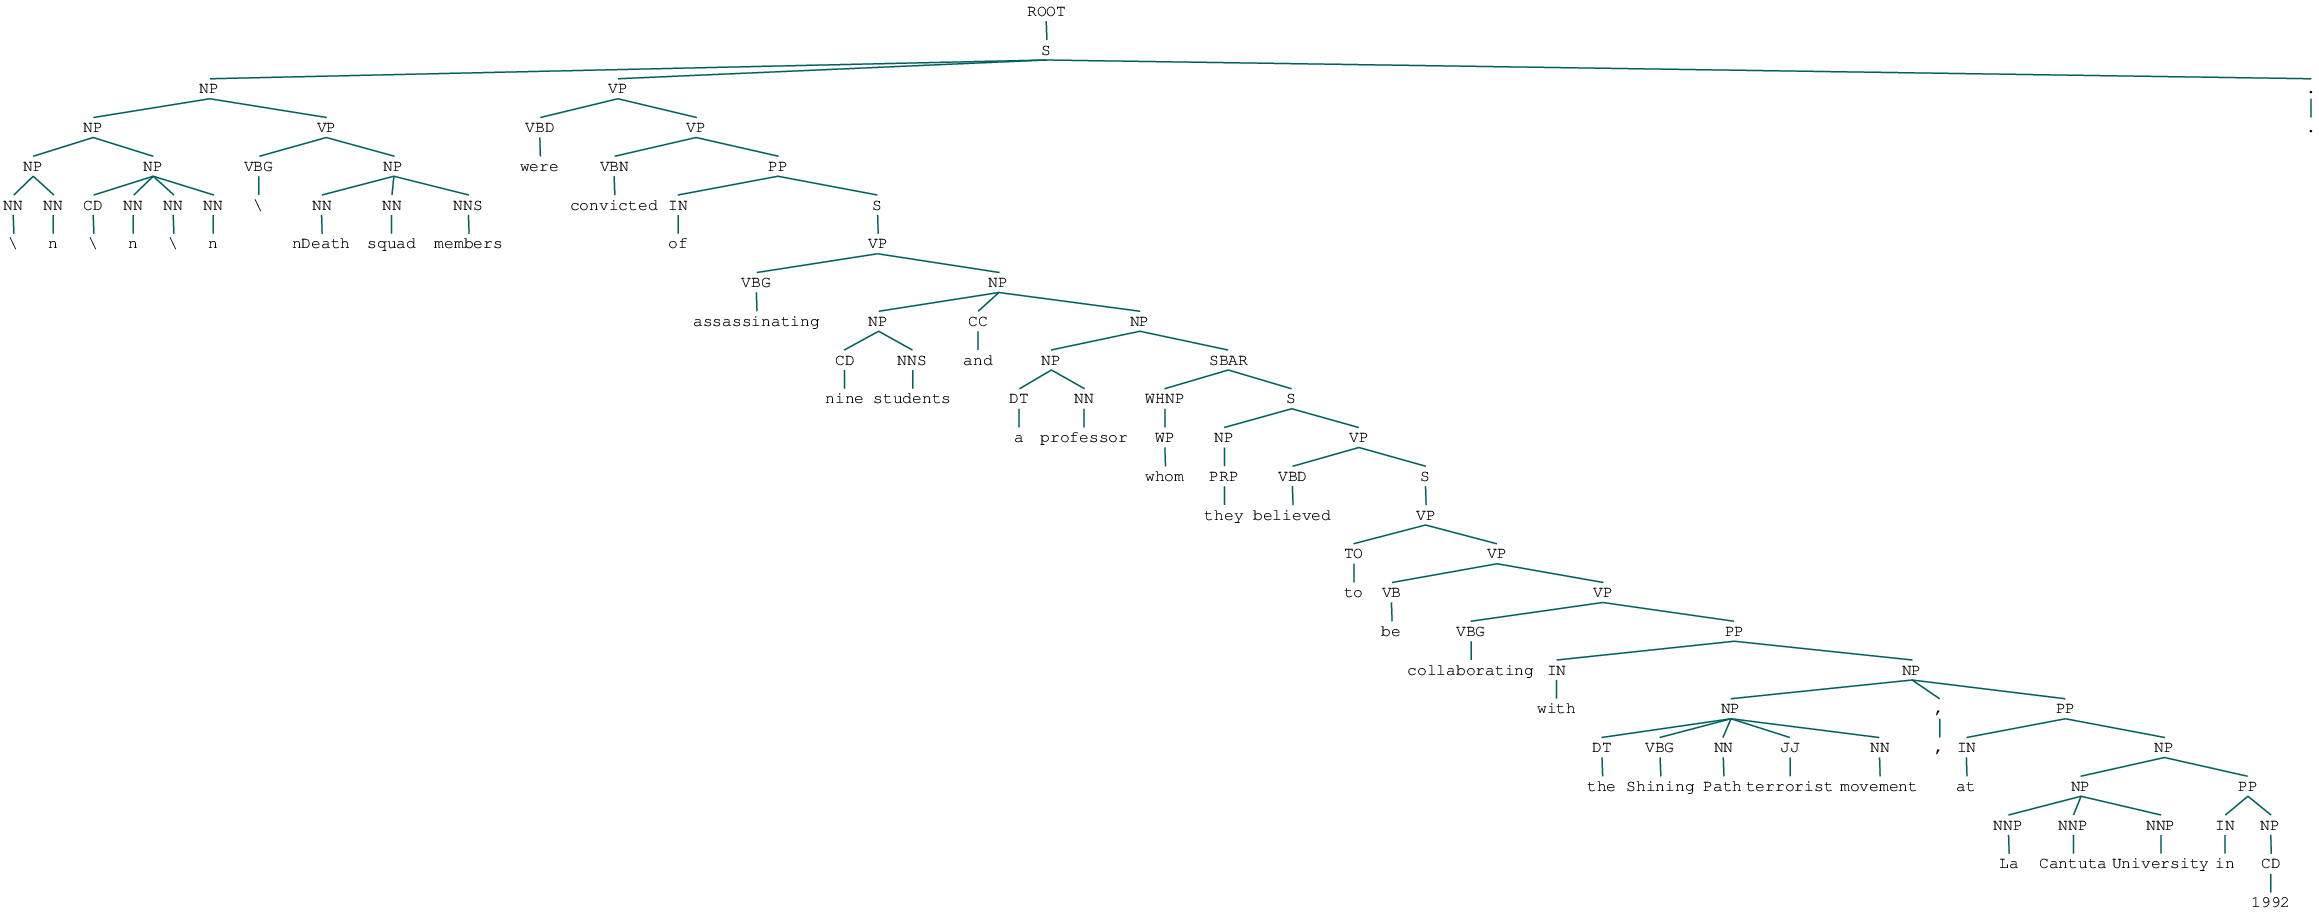

7

'AID = 23484561'

'Code = 186'

'Text = Few Indians have forgotten that it was a Hindu nationalist, Naturam Vinayak Godse, who assassinated Mohandas K. Gandhi in 1948, only months after Gandhi, a Hindu, helped lead India to independence.'

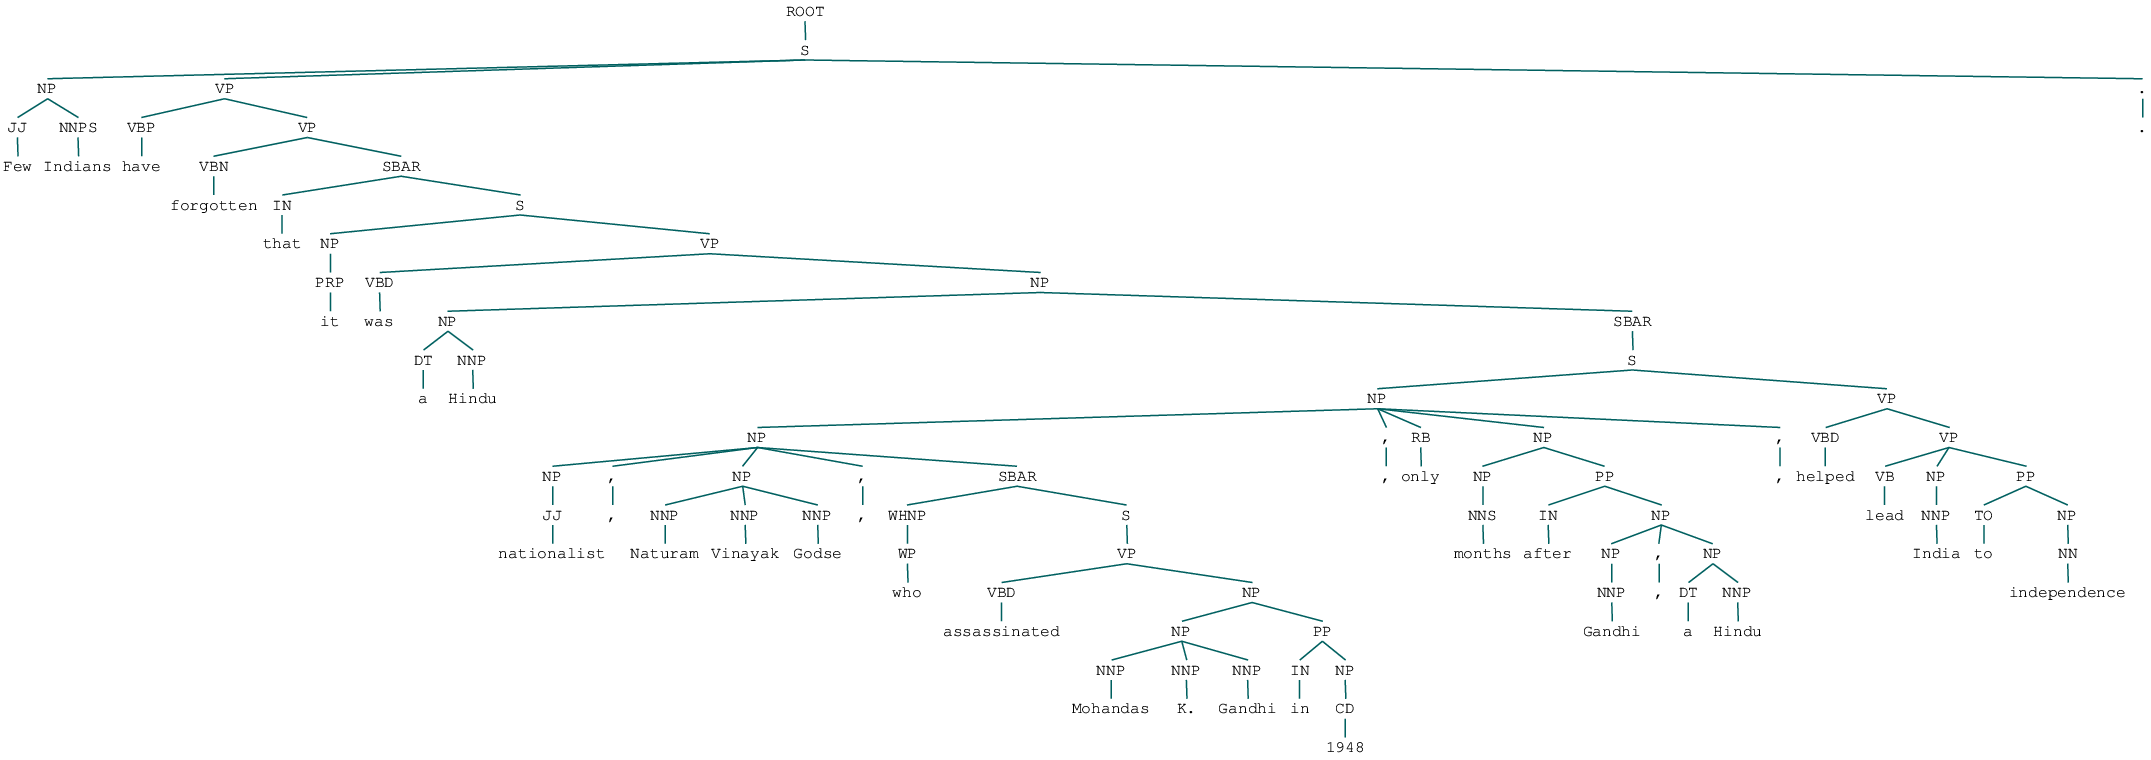

8

'AID = 23507011'

'Code = 186'

'Text = He was assassinated in 1981 by militant Islamic soldiers from his own army who considered peace with Israel a betrayal.'

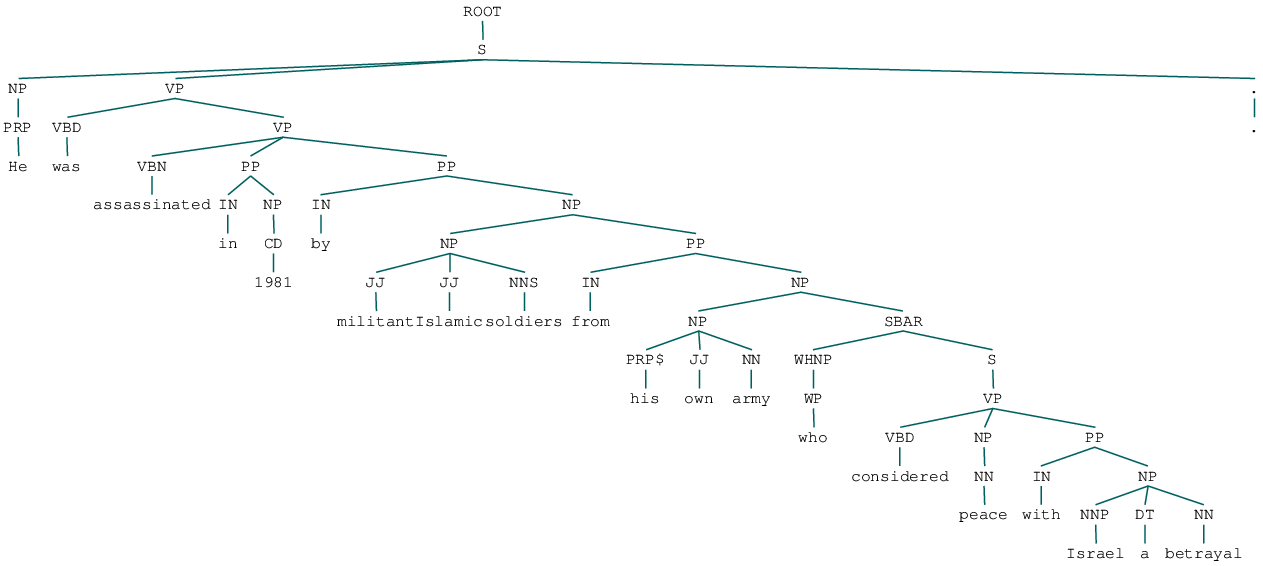

9

'AID = 23747074'

'Code = 186'

"Text = '' especially as made by ''a spiritual leader whom hundreds of thousands of people listen to attentively.''\\n\\n\\n\\nFor many here, the words brought back uncomfortable memories of the harsh words aimed at Yitzhak Rabin, the prime minister assassinated in 1995, by religious leaders."

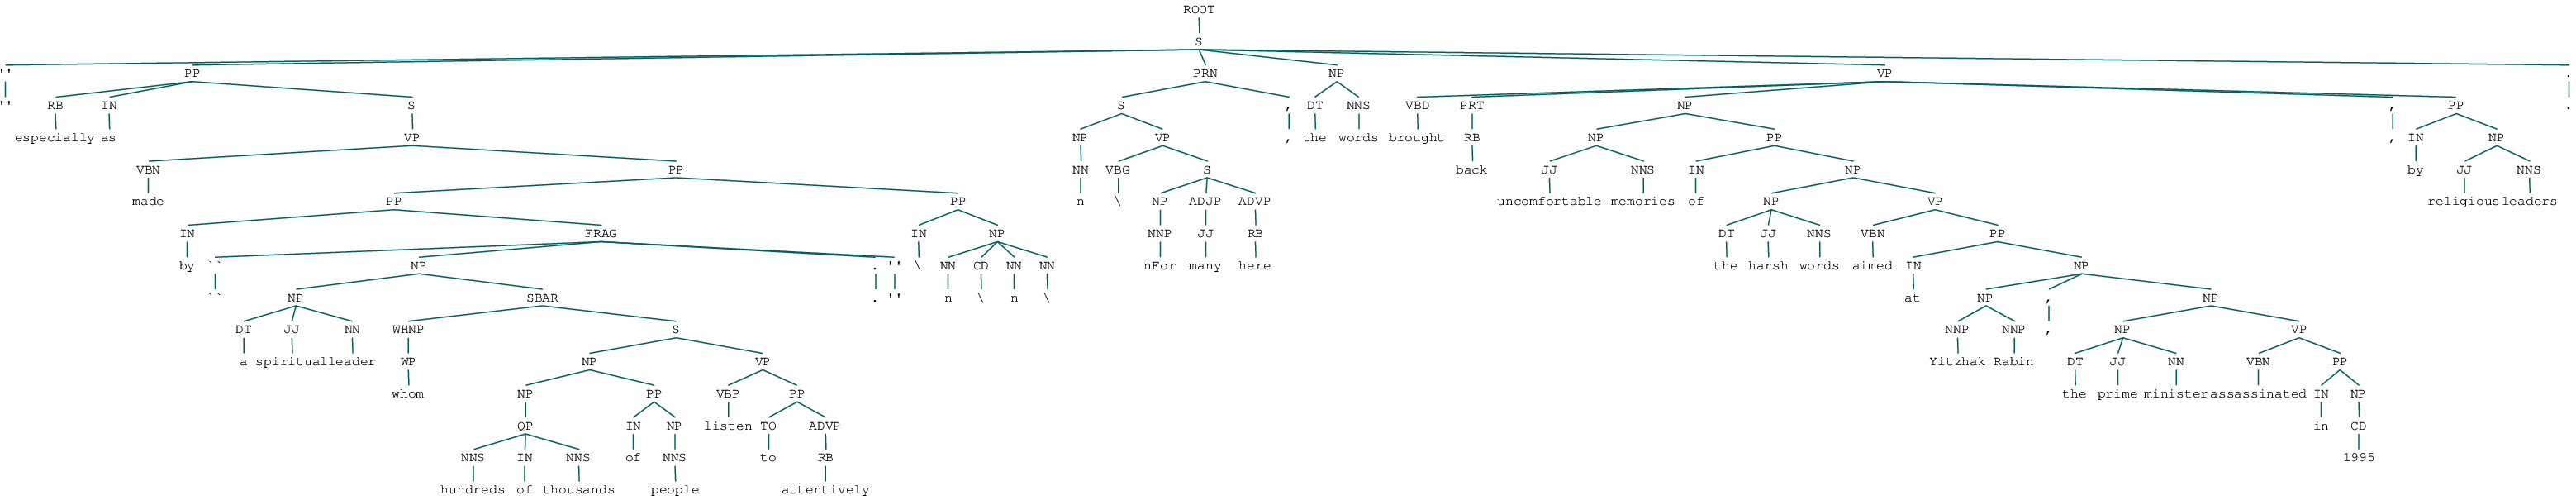

10

'AID = 23808617'

'Code = 186'

"Text = After Palestinian gunmen killed Israel's tourism minister on Oct. 17, Israeli forces moved into seven Palestinian-controlled cities, in part, Israelis said, to stop further attacks."

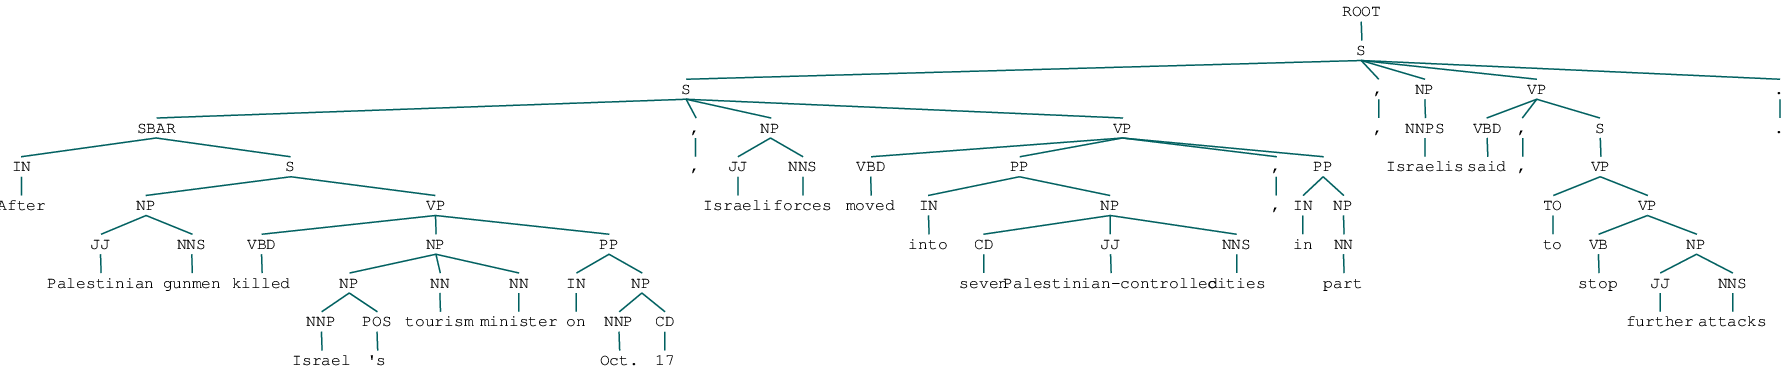

11

'AID = 23811772'

'Code = 186'

'Text = In Egypt, Islamic militants assassinated intellectuals and officials of a government they thought too secular.\\n\\n\\nThe fundamentalist convulsions touched North Africa as well, prompting a harsh backlash from security forces.\\nAlgeria plunged into civil war in 1992, after the military canceled parliamentary elections when it seemed certain Islamic militants would win.'

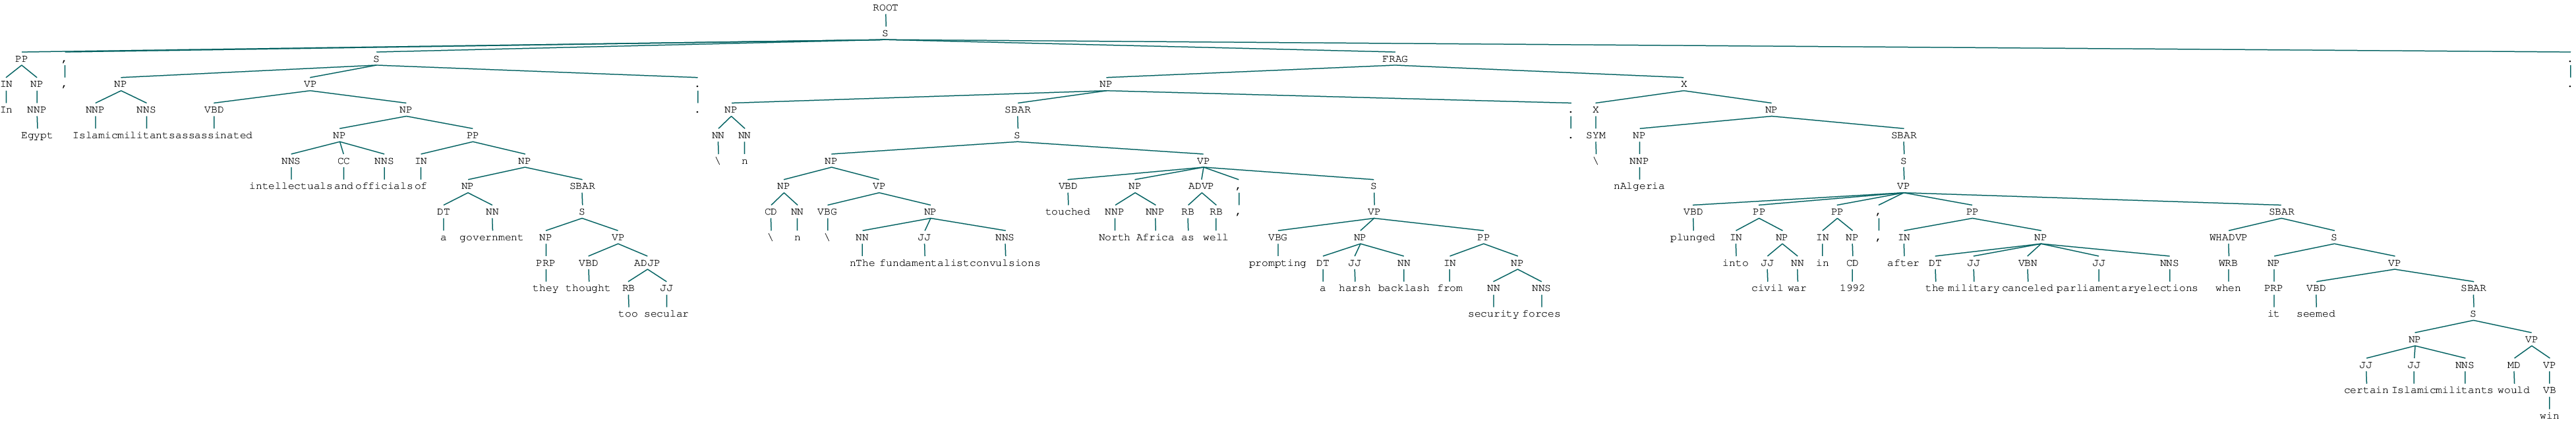

12

'AID = 23848041'

'Code = 186'

'Text = "The Central Intelligence Agency, using a missile fired by an unmanned Predator aircraft, killed a senior leader of Al Qaeda and five low-level associates traveling by car in Yemen on Sunday, American officials said today.\\nThe officials said the missile strike killed Qaed Salim Sinan al-Harethi, also known as Abu Ali, a man they described as the senior Qaeda operative in Yemen and perhaps one of the top dozen or so Qaeda figures in the world.\\n  A C.I.A. spokesman refused to comment today.'

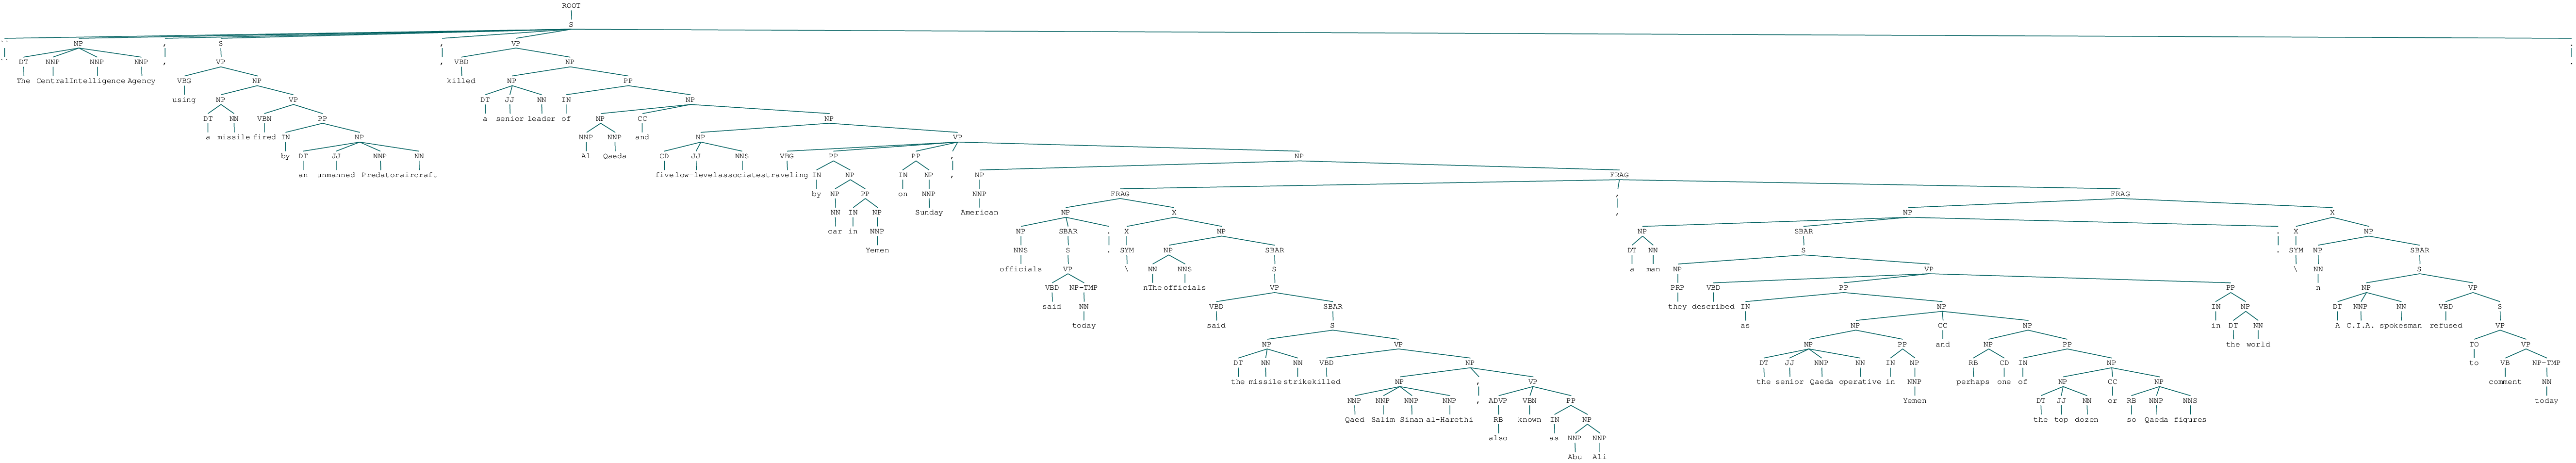

13

'AID = 23909152'

'Code = 186'

'Text =  more sacrifice,\'\' blared a voice amplified through loudspeakers as more than 1,000 Palestinians marched through Gaza City today during the funeral procession.\\nThat strike was part of Israel\'s response to a suicide bombing last week that killed 21 people aboard a bus in Jerusalem, and it followed a similar strike on Thursday, when the Israeli military killed an influential Hamas leader and two bodyguards."'

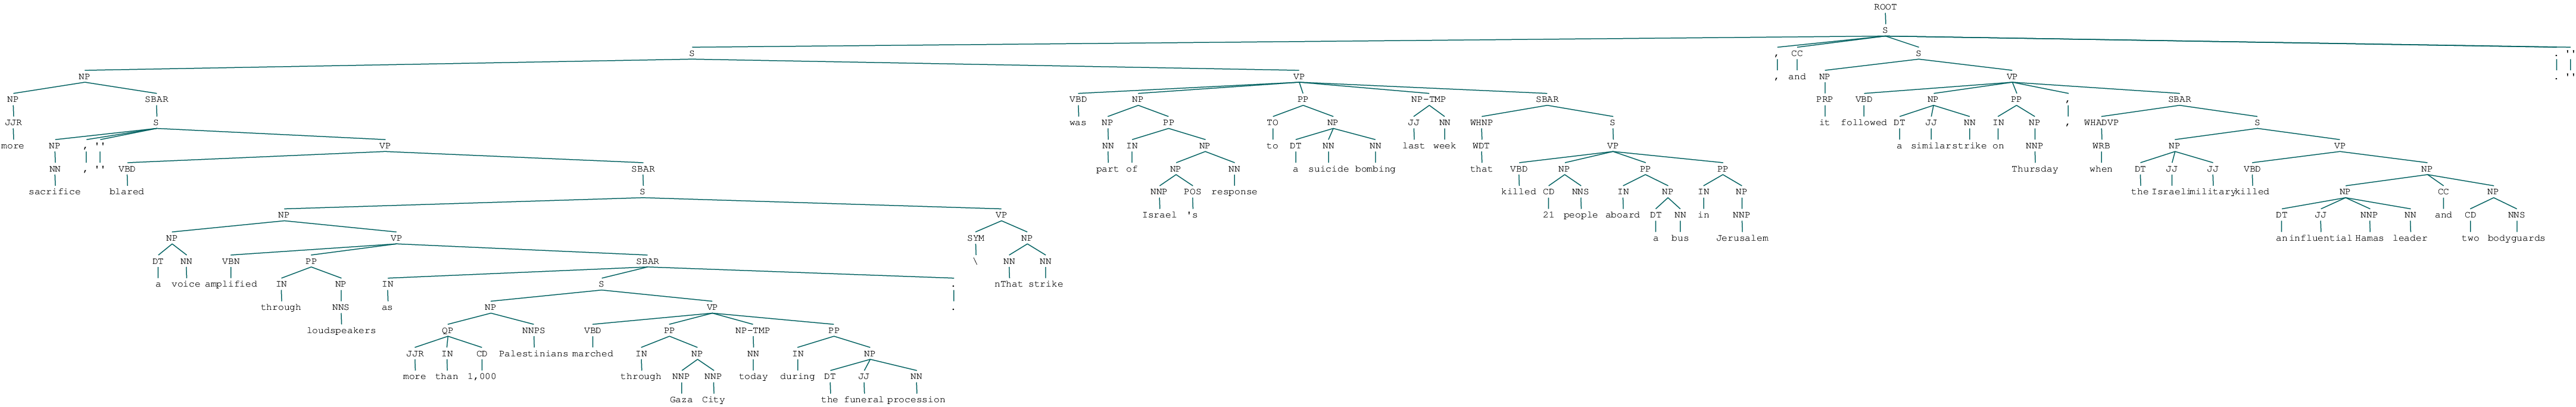

14

'AID = 23955619'

'Code = 186'

'Text = "Rebels executed 52 paramilitary police officers and 8 of their children last year as they cowered in a jail cell, Amnesty International said.'

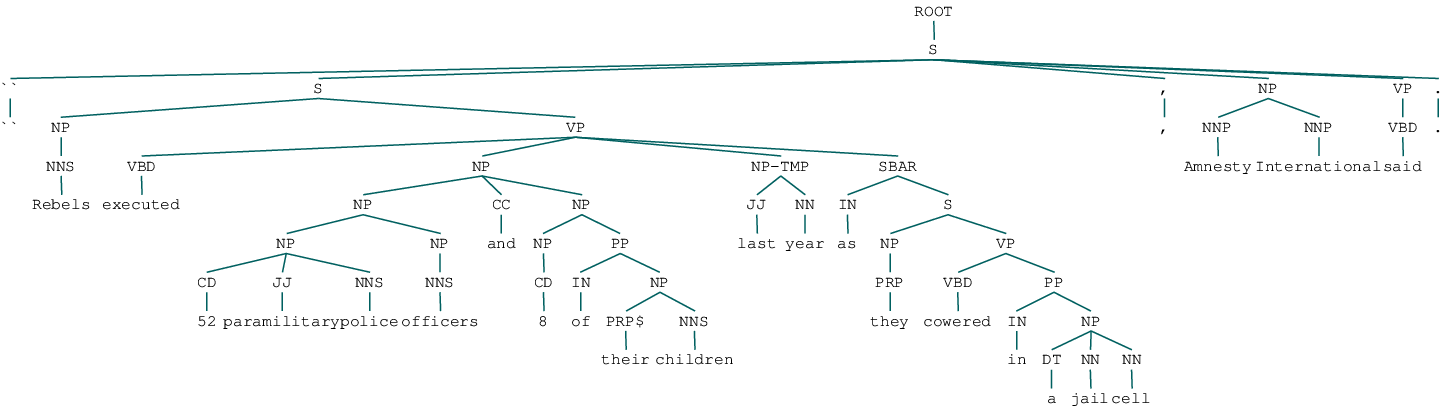

15

'AID = 23967911'

'Code = 186'

"Text = But I do not want my children and grandchildren on the 50th or 100th anniversary to see a show in which a man I knew well is accused of assassinating President Kennedy.''\\n\\n\\nMr."

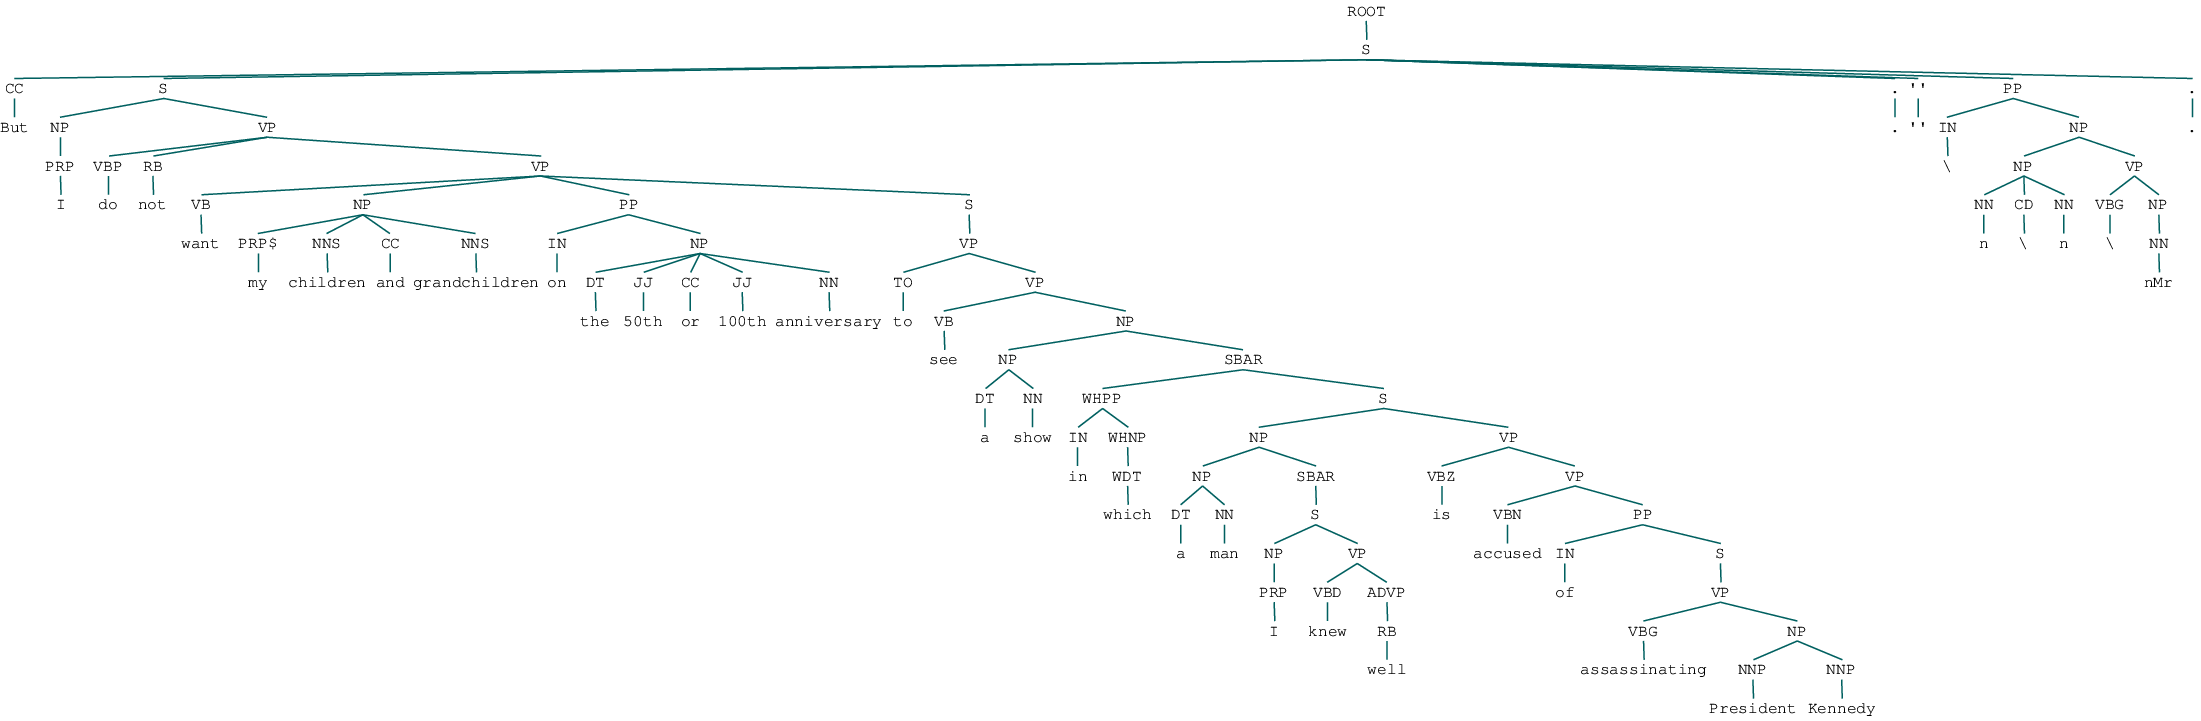

16

'AID = 24007079'

'Code = 186'

"Text = It was here in 1995 that Yitzhak Rabin, then prime minister, was assassinated by an Israeli extremist after speaking at a peace rally.\\n\\n\\n\\n''I am here to tell the prime minister that we have to leave Gaza, but he already knows this,'' said Ami Ayalon, a former head of the Shin Bet security service who is now promoting an informal peace plan he has developed with a Palestinian partner."

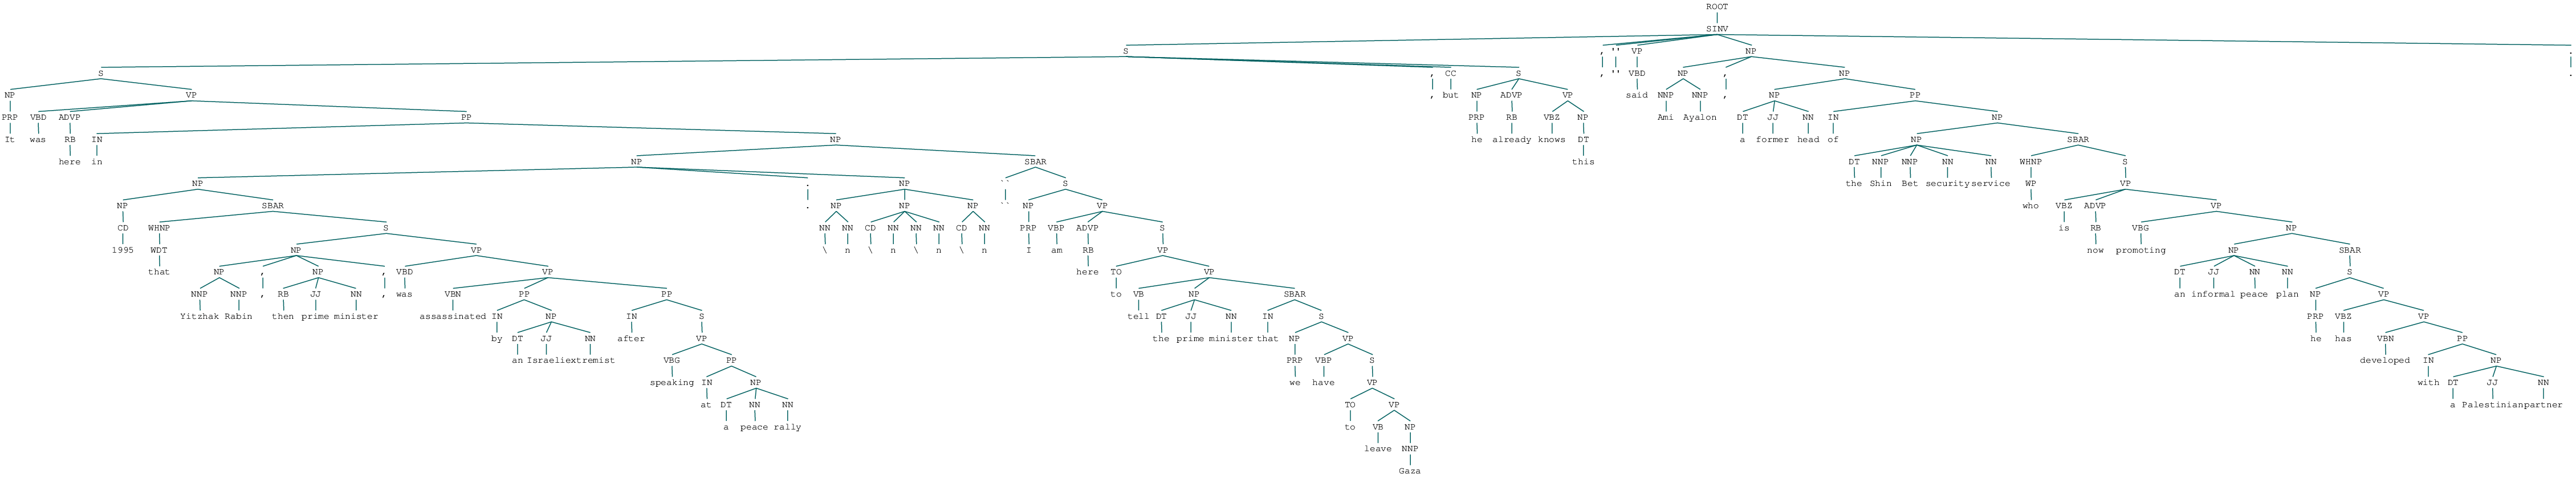

17

'AID = 24039000'

'Code = 186'

'Text = That promise has not gone over well among party workers whose colleagues have long been attacked and assassinated by insurgents.'

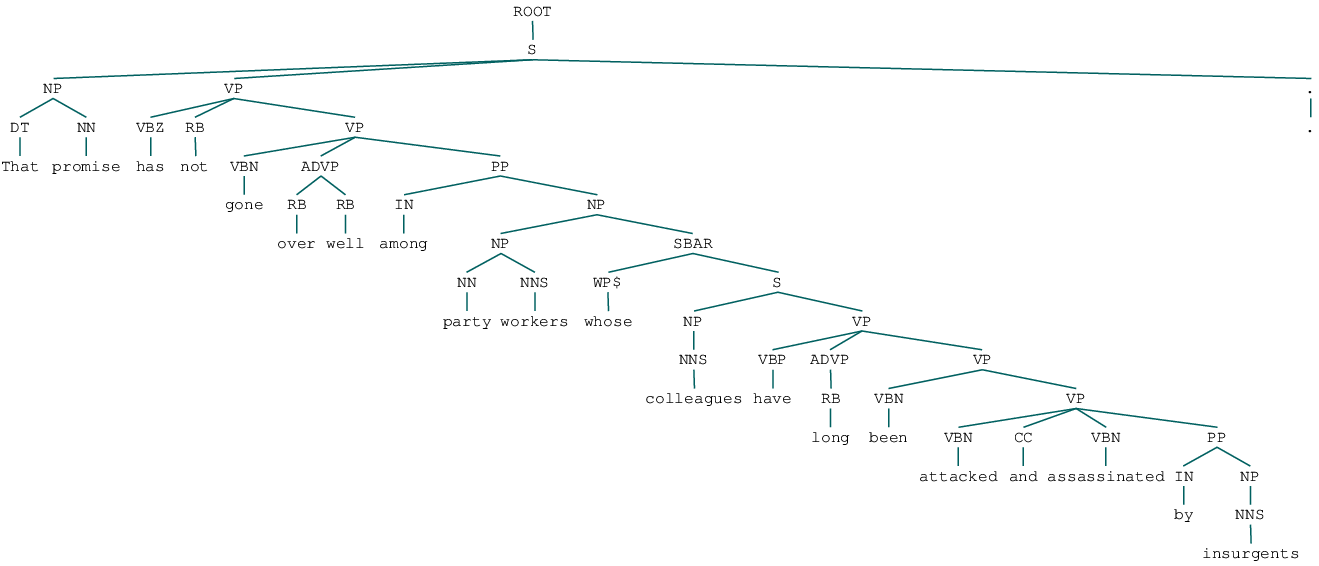

18

In [44]:
for i in range(len(accent5_186)):
    parsed_output(accent5_186, i)
    display(i)

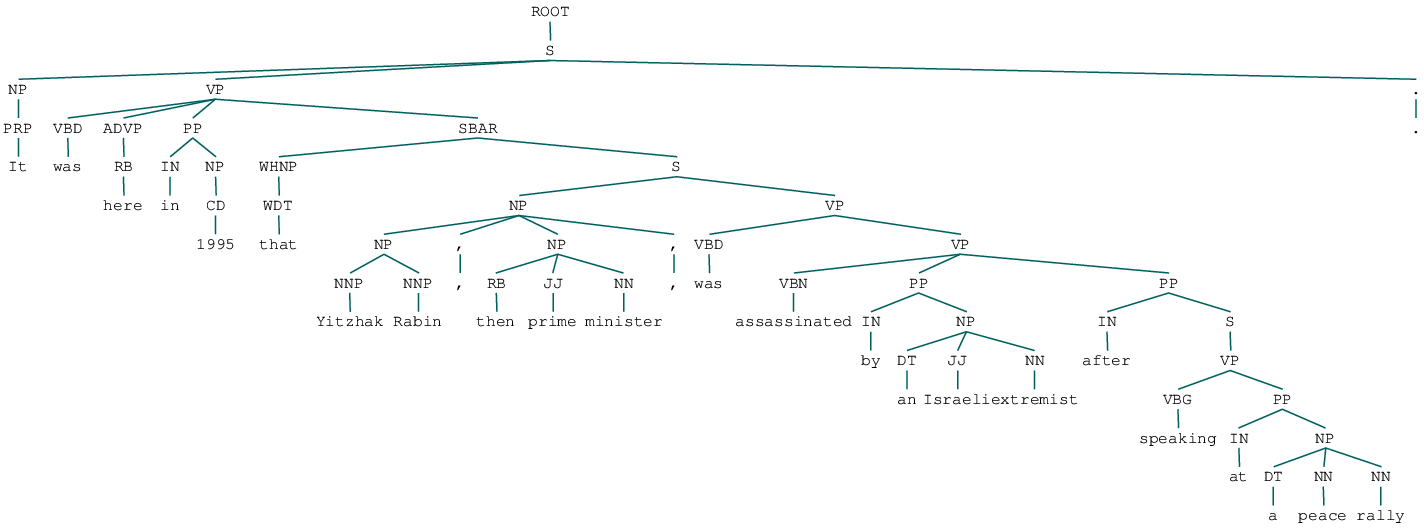

In [51]:
one_sentence_parser("It was here in 1995 that Yitzhak Rabin, then prime minister, was assassinated by an Israeli extremist after speaking at a peace rally.")